<a href="https://colab.research.google.com/github/mpintoponce/python_utec/blob/main/Modulo03%3AVisualizacion_de_Datos/Python_Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

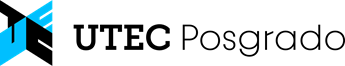


# TAREA 1
## Profesor: Germain Garcia Zanabria

### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso. Si necesitas ayuda o tienes alguna pregunta, no dudes en levantar la mano para que pueda asistirte.


Dada la siguiente noticia, responde las preguntas.

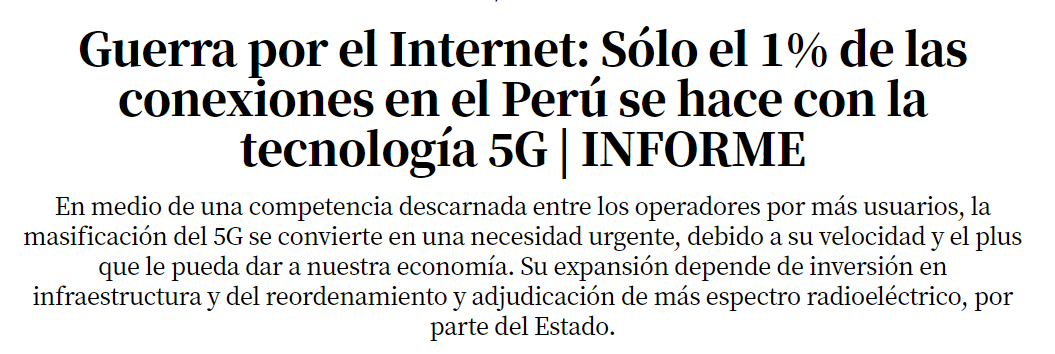

Extraído de [El Comercio](https://elcomercio.pe/economia/dia-1/guerra-por-el-internet-solo-el-1-de-las-conexiones-en-el-peru-se-hace-con-la-tecnologia-5g-informe-movistar-claro-entel-bitel-osiptel-demanda-4g-fibra-optica-internet-satelital-antenas-ancho-de-banda-noticia/#google_vignette)

In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET

# Lee el archivo .xlsx
df = pd.read_excel("https://github.com/germaingarcia/PythonProgramFiles/raw/main/clase1/Antenas.xlsx")

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.head()

      Empresa    Region    Provincia     Distrito Centro Poblado  2G  3G  4G  \
0  Telefónica  AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    CHACHAPOYAS   6  18  27   
1  Telefónica  AMAZONAS  CHACHAPOYAS  CHACHAPOYAS      EL TAPIAL   0   1   2   
2  Telefónica  AMAZONAS  CHACHAPOYAS     ASUNCION       ASUNCION   2   0   0   
3  Telefónica  AMAZONAS  CHACHAPOYAS     ASUNCION  VISTA HERMOSA   1   0   0   
4  Telefónica  AMAZONAS  CHACHAPOYAS       BALSAS         BALSAS   1   0   0   

   5G  Unnamed: 9  
0   0         NaN  
1   0         NaN  
2   0         NaN  
3   0         NaN  
4   0         NaN  


## 1 ¿Cuál es la tecnología más usada en Perú, según la base de datos? (5 Puntos)

In [ ]:
import pandas as pd

# Calcular la suma total de cada tecnología en todo el DataFrame
total_2g = df['2G'].sum()
total_3g = ### Completar
total_4g = ### Completar
total_5g = ### Completar

# Encontrar la tecnología más utilizada
tecnologia_mas_utilizada = max([('2G', total_2g), ('3G', total_3g), ('4G', total_4g), ('5G', total_5g)], key=lambda x: x[1])[0]

print("La tecnología más utilizada en Perú es:", tecnologia_mas_utilizada)


## 2 ¿Cuál es la tecnología con menor porcentaje de uso? ¿Cuál es su porcentaje de uso? (5 puntos)

In [ ]:
import pandas as pd

# Calcular el total de todas las tecnologías
total_tecnologias = df[['2G', '3G', '4G', '5G']].sum().sum()

# Calcular el porcentaje de uso de cada tecnología
porcentaje_uso = df[['2G', '3G', '4G', '5G']].sum() / ### Completar  * 100

# Encontrar la tecnología con el menor porcentaje de uso
tecnologia_menor_porcentaje = porcentaje_uso.idxmin()
menor_porcentaje = porcentaje_uso.min()

print("La tecnología con el menor porcentaje de uso es:", tecnologia_menor_porcentaje)
print("El porcentaje de uso más bajo es:", menor_porcentaje, "%")


## Ejercício 3: Simulación de Estación de Gasolina (10 puntos)



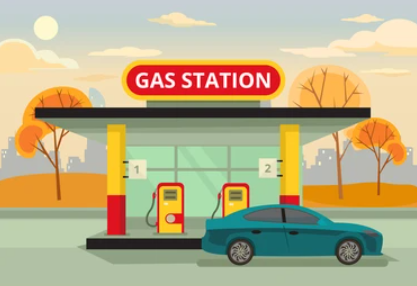

 En este ejercício se simulará la llegada de vehículos a la estación y la disponibilidad de surtidores para atenderlos.


**Descripción del problema:**
- Cada vehículo llega a la estación en momentos aleatorios, siguiendo un intervalo de llegada exponencialmente distribuido (`random.expovariate`).
- Cada vehículo debe esperar a que haya un surtidor disponible.
- Una vez que obtiene acceso al surtidor, el vehículo realiza un repostaje que también tiene una duración aleatoria (`random.randint` distribución uniforme).
- Se calcula el tiempo total de espera de cada vehículo y se registran estos tiempos para analizar la eficiencia operativa de la estación.
- Al finalizar la simulación, se muestra un histograma que representa la distribución de los tiempos de espera de los vehículos, y se calcula el tiempo promedio de espera como métrica de rendimiento.

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Parámetros de la simulación
NUM_SURTIDORES = 2  # Número de surtidores disponibles
TIEMPO_REPOSTAJE_MIN = 5  # Tiempo mínimo de repostaje (minutos)
TIEMPO_REPOSTAJE_MAX = 15  # Tiempo máximo de repostaje (minutos)
TIEMPO_SIMULACION = 60  # Duración de la simulación (minutos)
INTERVALO_LLEGADA = 10  # Intervalo medio de llegada de vehículos (minutos)

# Lista para almacenar los tiempos de espera de los vehículos
tiempos_espera = []

# Proceso de llegada de vehículos a la estación de gasolina
def llegada_vehiculo(env, nombre, surtidores):
    print(f'{nombre} llegó a la estación en el minuto {env.now:.2f}')
    with surtidores.request() as req:
        yield req
        tiempo_espera = ### Completar  # Capturar el tiempo en el que llegó a la estación (tiempo actual) usando: env
        print(f'{nombre} comenzó a repostar en el minuto {env.now:.2f}')

        # Generar tiempo aleatorio de repostaje
        tiempo_repostaje = ### Completar   # Distribución uniforme, considera usar los rangos de tiempo de repostaje
        yield env.timeout(### Completar con el tiempo aleaorio calculado anteriormente)

        # Calcular tiempo total de espera
        tiempo_espera = ### Completar  Diferencia entre el tiempo actual y el tiempo en el que llegó a la estación
        tiempos_espera.append(### Completar con el tiempo calculador en la linea anterior)

        print(f'{nombre} completó el repostaje en el minuto {env.now:.2f}. Tiempo de repostaje: {tiempo_repostaje} minutos')

# Función principal de la simulación
def simulacion_estacion(env, num_surtidores):
    surtidores = simpy.Resource(env, capacity=num_surtidores)
    num_vehiculos = 0

    while True:
        num_vehiculos += 1
        env.process(llegada_vehiculo(env, f'Vehículo {num_vehiculos}', surtidores))
        tiempo_llegada = ### Completar con funcion de distribución exponencial (1.0 / INTERVALO_LLEGADA)      # distribución exponencial
        yield env.timeout(tiempo_llegada)

# Configuración de la simulación
random.seed(42)
env = simpy.Environment()
env.process(## Completar  con funcion principal (env, NUM_SURTIDORES))
env.run(until=## Completar tiempo de simulación )

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.hist(tiempos_espera, bins=10, edgecolor='black')
plt.title('Distribución de Tiempos de Espera en la Estación de Gasolina')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Métricas
tiempo_promedio_espera = sum(tiempos_espera) / len(tiempos_espera) if tiempos_espera else 0
print(f'Tiempo promedio de espera: {tiempo_promedio_espera:.2f} minutos')
